In [1]:
import os
import sys
import shutil
import dotenv
from   dotenv import find_dotenv, load_dotenv
import matplotlib
load_dotenv(find_dotenv())
PATH_P     = os.environ['PATH_P']
os.chdir(PATH_P)
sys.path.insert(0, PATH_P)
import pandas as pd
from src.dst.outputhandler.pickle import tic,toc,pickle_save_,pickle_load
from src.dst.plots.plots import plotting_tool,retrieve_data,SeabornFig2Grid
from src.visualization.vis_LSTM_p.main import main_visualize
import  numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from src.visualization.vis_LSTM_p.main import main_visualize
from src.models.CMA_ES.CMA_ES import CMA_ES

## experiments

In [2]:
path                                  = './models/test_shuffle/object/DEEP2/bayes_opt/'
RD                                    = retrieve_data()
data,dict_,path_best,hist             = RD.get_best_D1(path)
data['df_t_val_train']                = pd.concat([data['df_t_train'],data['df_t_val']])
AUC_v_a                               = RD.get_all(path,'AUC_v')

val_loss_a                            = RD.get_all(path,'val_f')
dict_['AUC_v']                        = data['AUC_v']

RD.print_dict(dict_)

str_list                              = data['path_o'].split('/')
data['path_o']                        = path_best
BO_vis                                = plotting_tool(dict_)

lr           : 0.0028405
time_dim     : 23
encoder      : [135, 426]
decoder      : [359]
vector       : 135
AUC_v        : 0.7188904494382024


In [3]:
def return_dict():
    dict_c = {
        'path_i'   : './models/bayes_opt/DEEP2/',
        'path_save': './models/CMA_ES/DEEP2/',

        'resolution_AUC': 1000,

        ###### CMA_ES    ######
        'CMA_ES': True,
        'verbose_CMA': 1,
        'verbose_CMA_log': 0,
        'evals': 21*150,
        'bounds': [-100., 100.],
        'sigma': 0.4222222222222225,
        'progress_ST': 0.3,
        'popsize'    : 21,
        
        'mode'       : 'linear',

        'epoch': 0

    }

    return dict_c

## plus min sigmoid

In [4]:
dict_c = return_dict()
dict_c['mode']   = 'sigmoid'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_min_sigmoid')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 360 (seed=586254, Fri Jun  8 16:02:55 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     21 -7.537913187165848e-01 1.0e+00 4.15e-01  4e-01  4e-01 0:58.4
    2     42 -7.561367810833509e-01 1.0e+00 4.09e-01  4e-01  4e-01 1:06.3
    3     63 -7.586495326145589e-01 1.0e+00 4.03e-01  4e-01  4e-01 1:14.7
    4     84 -7.601858616757595e-01 1.0e+00 3.98e-01  4e-01  4e-01 1:23.2
    5    105 -7.624903552675603e-01 1.0e+00 3.93e-01  4e-01  4e-01 1:32.6
    6    126 -7.693526250742559e-01 1.0e+00 3.89e-01  4e-01  4e-01 1:40.6
    7    147 -7.677582569151878e-01 1.0e+00 3.85e-01  4e-01  4e-01 1:48.3
    8    168 -7.708718838125541e-01 1.0e+00 3.81e-01  4e-01  4e-01 1:56.1
    9    189 -7.726881661693512e-01 1.0e+00 3.78e-01  4e-01  4e-01 2:05.1
   10    210 -7.744634797511830e-01 1.0e+00 3.75e-01  4e-01  4e-01 2:12.6
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    231 -7.781506

  100   2100 -9.200323653322227e-01 1.2e+00 4.98e-01  5e-01  5e-01 20:49.0
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2121 -9.199265293302288e-01 1.2e+00 5.00e-01  5e-01  5e-01 21:33.8
  102   2142 -9.202781779820148e-01 1.2e+00 5.02e-01  5e-01  5e-01 21:39.8
  103   2163 -9.213228817436311e-01 1.2e+00 5.04e-01  5e-01  5e-01 21:46.2
  104   2184 -9.234839846230531e-01 1.2e+00 5.06e-01  5e-01  5e-01 21:52.7
  105   2205 -9.224256246031151e-01 1.2e+00 5.07e-01  5e-01  5e-01 21:59.7
  106   2226 -9.220159368534615e-01 1.2e+00 5.09e-01  5e-01  5e-01 22:06.5
  107   2247 -9.234259455251858e-01 1.2e+00 5.11e-01  5e-01  5e-01 22:12.0
  108   2268 -9.220193509180419e-01 1.2e+00 5.13e-01  5e-01  5e-01 22:18.0
  109   2289 -9.254982827255160e-01 1.2e+00 5.14e-01  5e-01  5e-01 22:23.9
  110   2310 -9.229172499026992e-01 1.2e+00 5.16e-01  5e-01  5e-01 22:29.9
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2331 -9.238049066936150

In [5]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

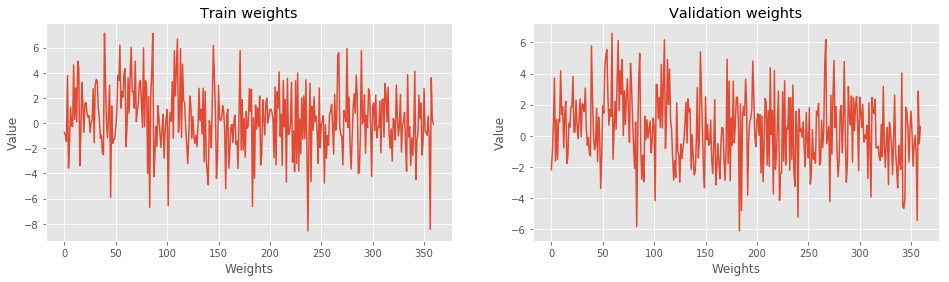

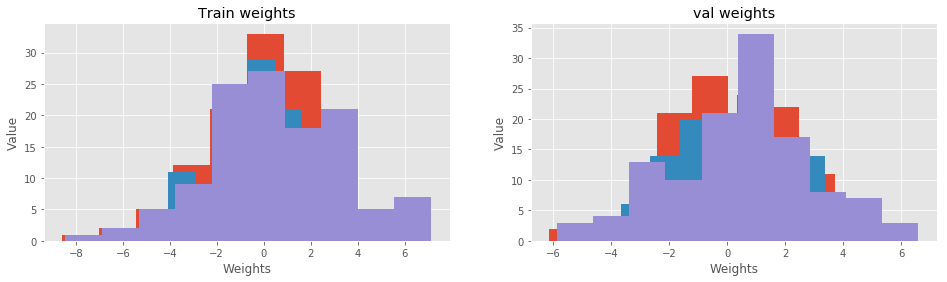

In [6]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

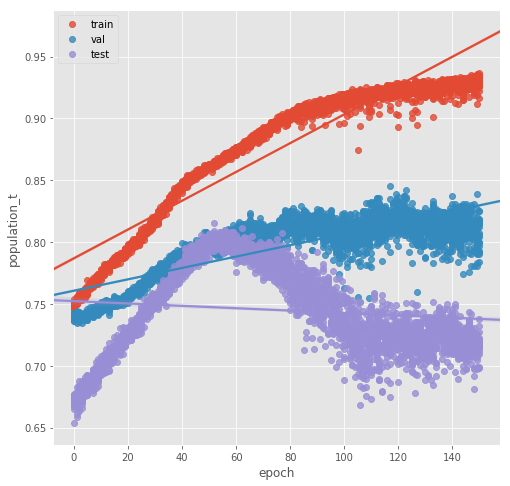

In [7]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

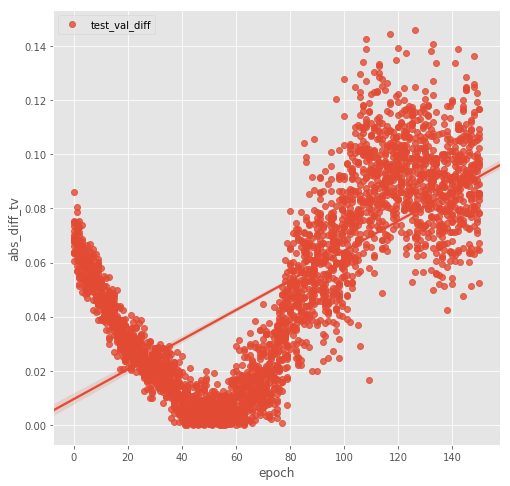

In [8]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

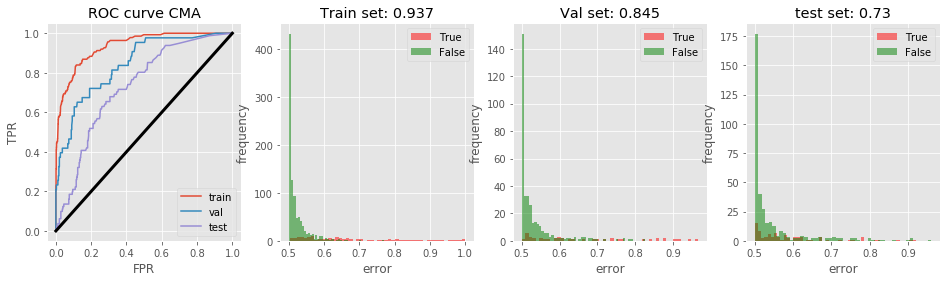

In [9]:
BO_vis.plot_cma(data)

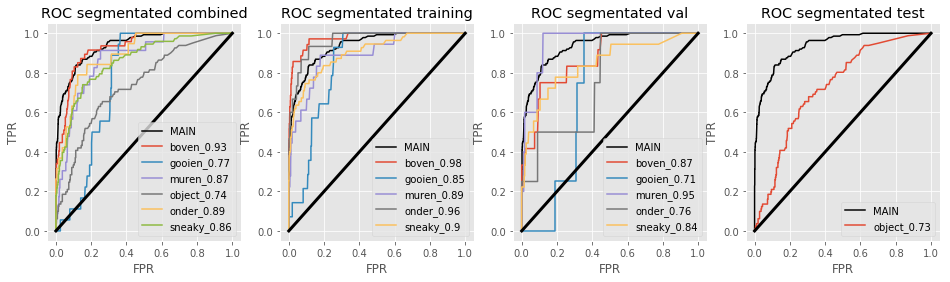

In [10]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

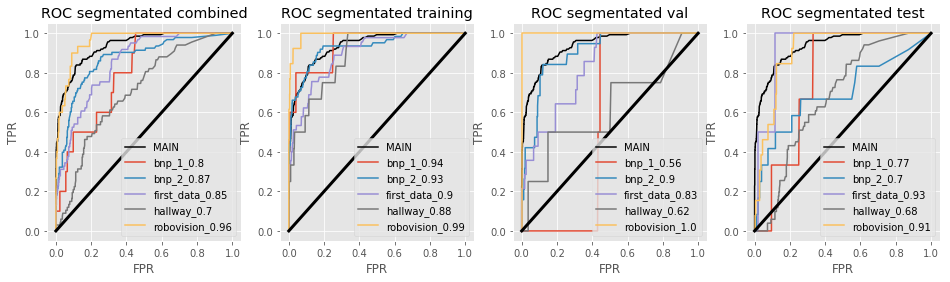

In [11]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus sigmoid

In [12]:
dict_c = return_dict()
dict_c['mode']   = 'sigmoid'
dict_c['bounds'] = [0,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_sigmoid')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 360 (seed=590648, Fri Jun  8 16:32:37 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     21 -7.564508750247521e-01 1.0e+00 4.15e-01  4e-01  4e-01 0:44.9
    2     42 -7.578677118256368e-01 1.0e+00 4.09e-01  4e-01  4e-01 0:50.4
    3     63 -7.611008309833189e-01 1.0e+00 4.03e-01  4e-01  4e-01 0:56.6
    4     84 -7.632516916689996e-01 1.0e+00 3.98e-01  4e-01  4e-01 1:02.7
    5    105 -7.668944985763352e-01 1.0e+00 3.93e-01  4e-01  4e-01 1:09.4
    6    126 -7.670925143220009e-01 1.0e+00 3.88e-01  4e-01  4e-01 1:14.9
    7    147 -7.691955781035554e-01 1.0e+00 3.84e-01  4e-01  4e-01 1:20.1
    8    168 -7.719370719616533e-01 1.0e+00 3.81e-01  4e-01  4e-01 1:25.1
    9    189 -7.737601824476111e-01 1.0e+00 3.77e-01  4e-01  4e-01 1:30.9
   10    210 -7.757642383563328e-01 1.0e+00 3.74e-01  4e-01  4e-01 1:36.1
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    231 -7.785569

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2121 -8.218677664506703e-01 1.2e+00 3.56e-01  4e-01  4e-01 24:50.7
  102   2142 -8.216253678654586e-01 1.2e+00 3.56e-01  4e-01  4e-01 24:57.9
  103   2163 -8.211712972762593e-01 1.2e+00 3.56e-01  4e-01  4e-01 25:06.0
  104   2184 -8.214205239906319e-01 1.2e+00 3.56e-01  4e-01  4e-01 25:13.5
  105   2205 -8.229875796330564e-01 1.2e+00 3.56e-01  4e-01  4e-01 25:23.2
  106   2226 -8.220896806483992e-01 1.2e+00 3.56e-01  4e-01  4e-01 25:31.4
  107   2247 -8.232948454452966e-01 1.2e+00 3.56e-01  4e-01  4e-01 25:38.8
  108   2268 -8.219394618068595e-01 1.2e+00 3.56e-01  4e-01  4e-01 25:46.9
  109   2289 -8.221613760045885e-01 1.2e+00 3.56e-01  4e-01  4e-01 25:54.4
  110   2310 -8.220077430984685e-01 1.2e+00 3.56e-01  4e-01  4e-01 26:02.4
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2331 -8.242098147528558e-01 1.2e+00 3.56e-01  4e-01  4e-01 26:53.2
  112   2352 -8.227690794999079

In [13]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

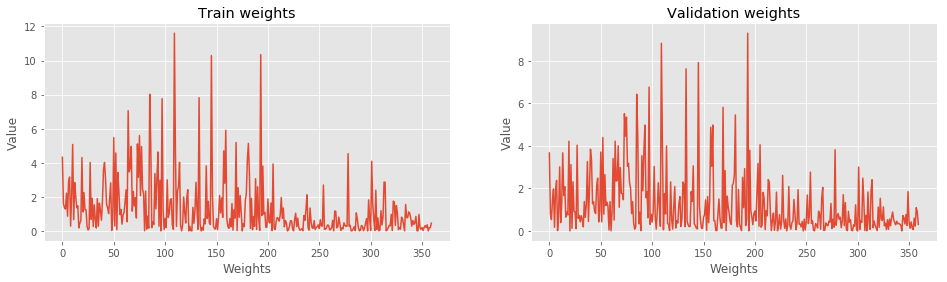

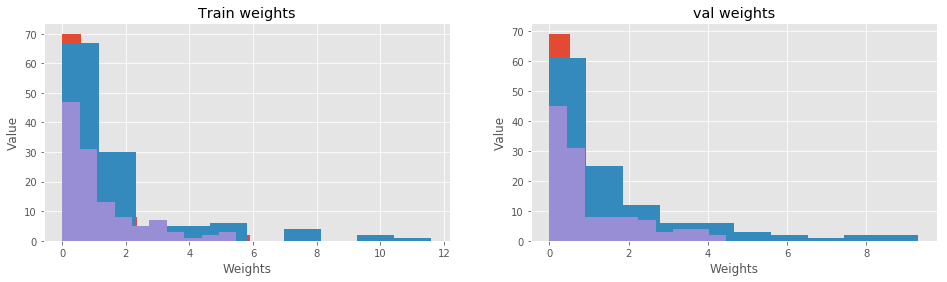

In [14]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

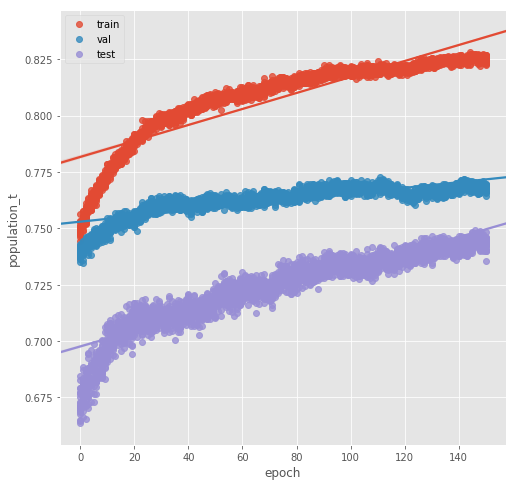

In [15]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

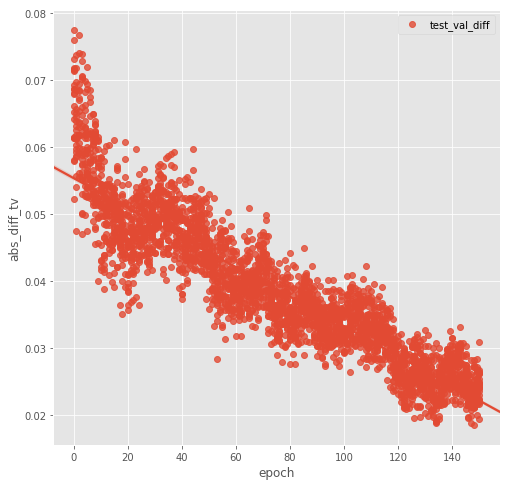

In [16]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

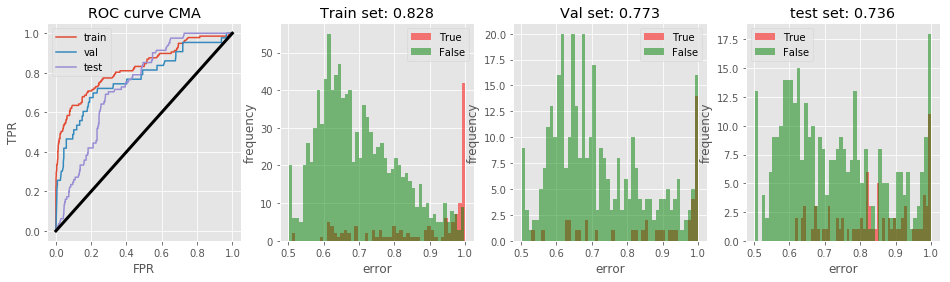

In [17]:
BO_vis.plot_cma(data)

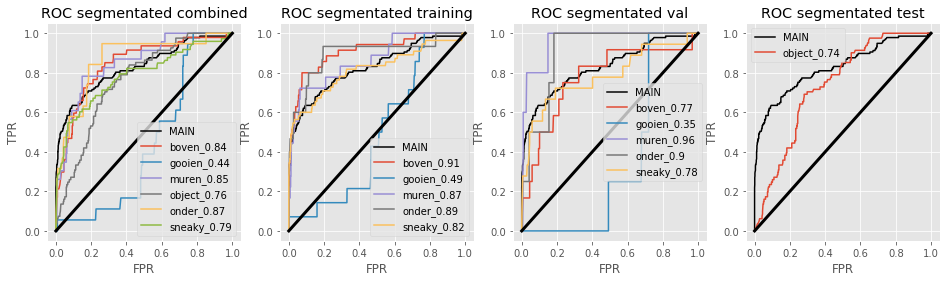

In [18]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

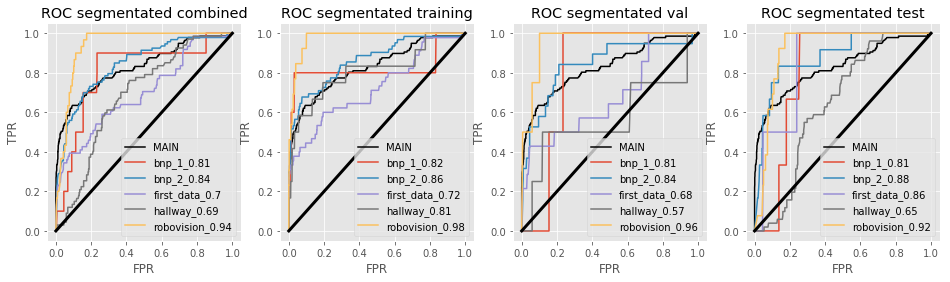

In [19]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

# DEEP2

In [20]:
# path                                  =  './models/CMA_ES/DEEP2/'
# path_a                                = [path]
# RD                                    = retrieve_data()
# df,dict_,path_best                    = RD.get_max_CMA(path)


# BO_vis                                = plotting_tool(dict_['dict_config'])

# df                                     = df[df['epoch'] < 150]
# array_AUC_tr_a                         = RD.get_all_cma(path_a,'AUC_tr')
# array_AUC_v_a                          = RD.get_all_cma(path_a,'AUC_v')
# array_AUC_t_a                          = RD.get_all_cma(path_a,'AUC_t')

NameError: name 'array_AUC_tr_a' is not defined

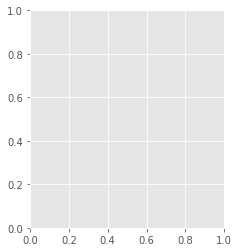

In [21]:
fig = plt.figure(figsize=(16,4))

ax1 = plt.subplot(141)
ax1 = plt.hist(array_AUC_tr_a)

ax2 = plt.subplot(142)
ax2 = plt.hist(array_AUC_v_a)

ax3 = plt.subplot(143)
ax3 = plt.hist(array_AUC_t_a)


ax4 = plt.subplot(144)
ax4 = plt.plot(array_AUC_tr_a,label = 'train')
ax4 = plt.plot(array_AUC_v_a,label = 'val')
ax4 = plt.plot(array_AUC_t_a,label = 'test')
plt.legend()
plt.show()


In [ ]:
BO_vis.plot_weigths(dict_['x_tr'],dict_['x_v'])

In [ ]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))



ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()
plt.savefig('./plots/pic/CMA_training')

In [ ]:
BO_vis.plot_cma(dict_)

In [ ]:
dict_['path_o'] = dict_['dict_config']['path_save']
BO_vis.save_ROC_segment(dict_,'segmentation',cma = True)

In [ ]:
dict_['path_o'] = dict_['dict_config']['path_save']
BO_vis.save_ROC_segment(dict_,'location',cma = True)

In [ ]:
dict_c = {
        'path'       :  path_best+'/',
        'mode'       : 'df_t_train',

        'path_dict'  : path_best+'/dict.p',

        'plot_mode'  : 'error'


}
vis = main_visualize(dict_c)
vis.play_videos()


In [ ]:
path_best+'/dict.p'